In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import warnings
import itertools
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("MER_T12_06.csv")
df.head(20)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5,CLEIEUS,197306,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
6,CLEIEUS,197307,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
7,CLEIEUS,197308,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
8,CLEIEUS,197309,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
9,CLEIEUS,197310,67.668,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [21]:
# Changing Month from int to Date
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce') #coerce to have a NaN field in empty or corrupted
df = pd.read_csv("MER_T12_06.csv", parse_dates=['Month'], index_col='Month', date_parser=dateparse) 
df.head(20)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [22]:
#drop all rows with null index 
#ts = time serie
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [23]:
#
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [24]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [25]:
ts.dropna(inplace = True)

In [26]:
# sources = CO2 sources
sources = ts.groupby('Description')
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


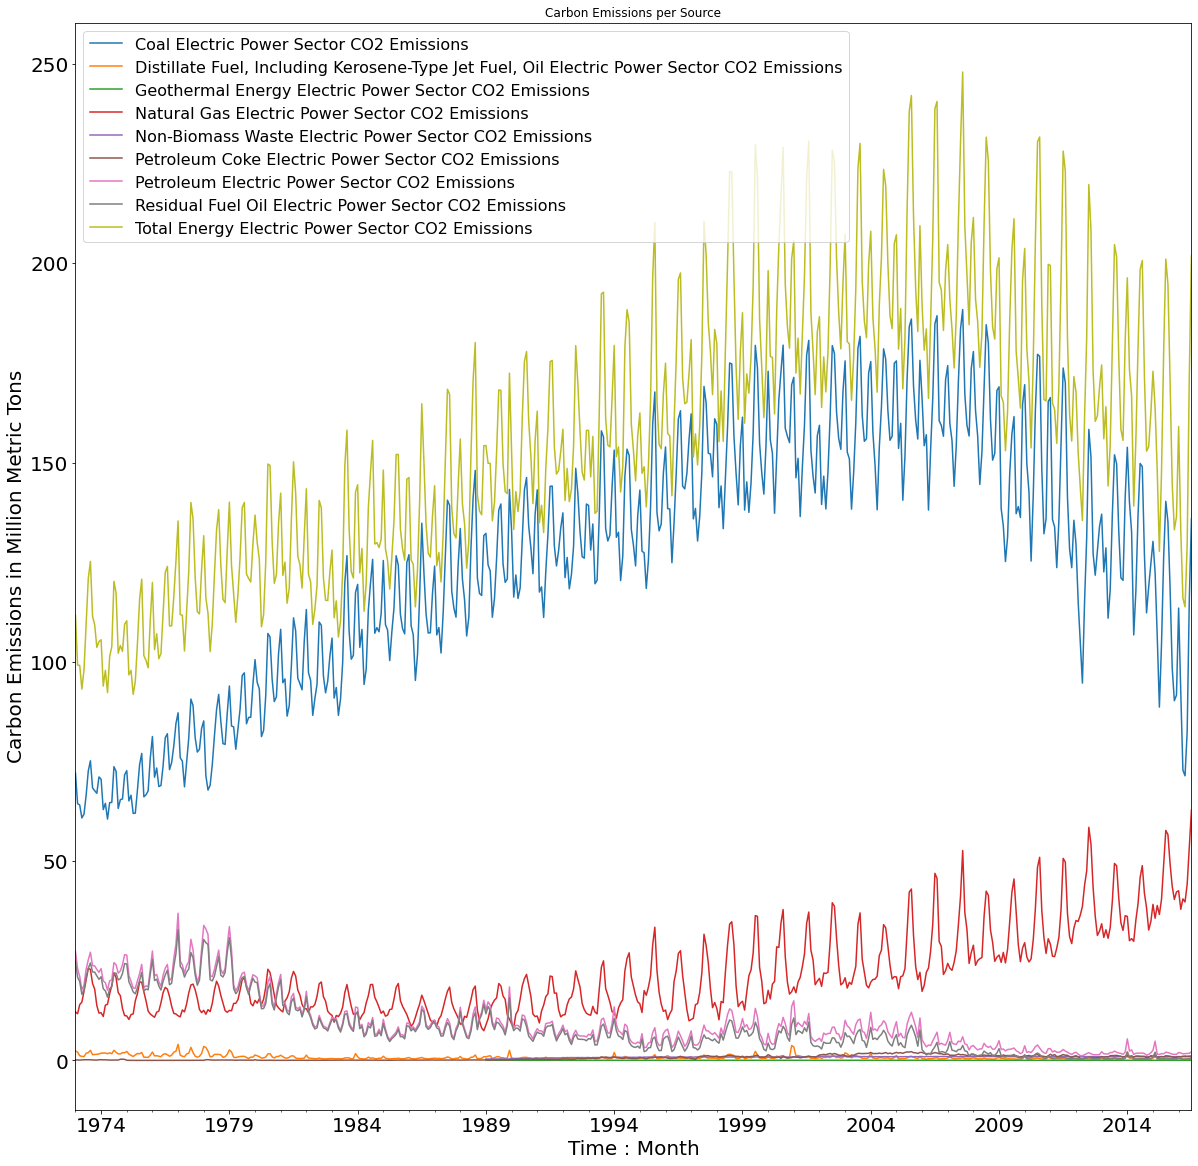

In [27]:
fig, ax = plt.subplots()
for desc, grp in sources:
    grp.plot( y='Value', label=desc,ax = ax, title='Carbon Emissions per Source', fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

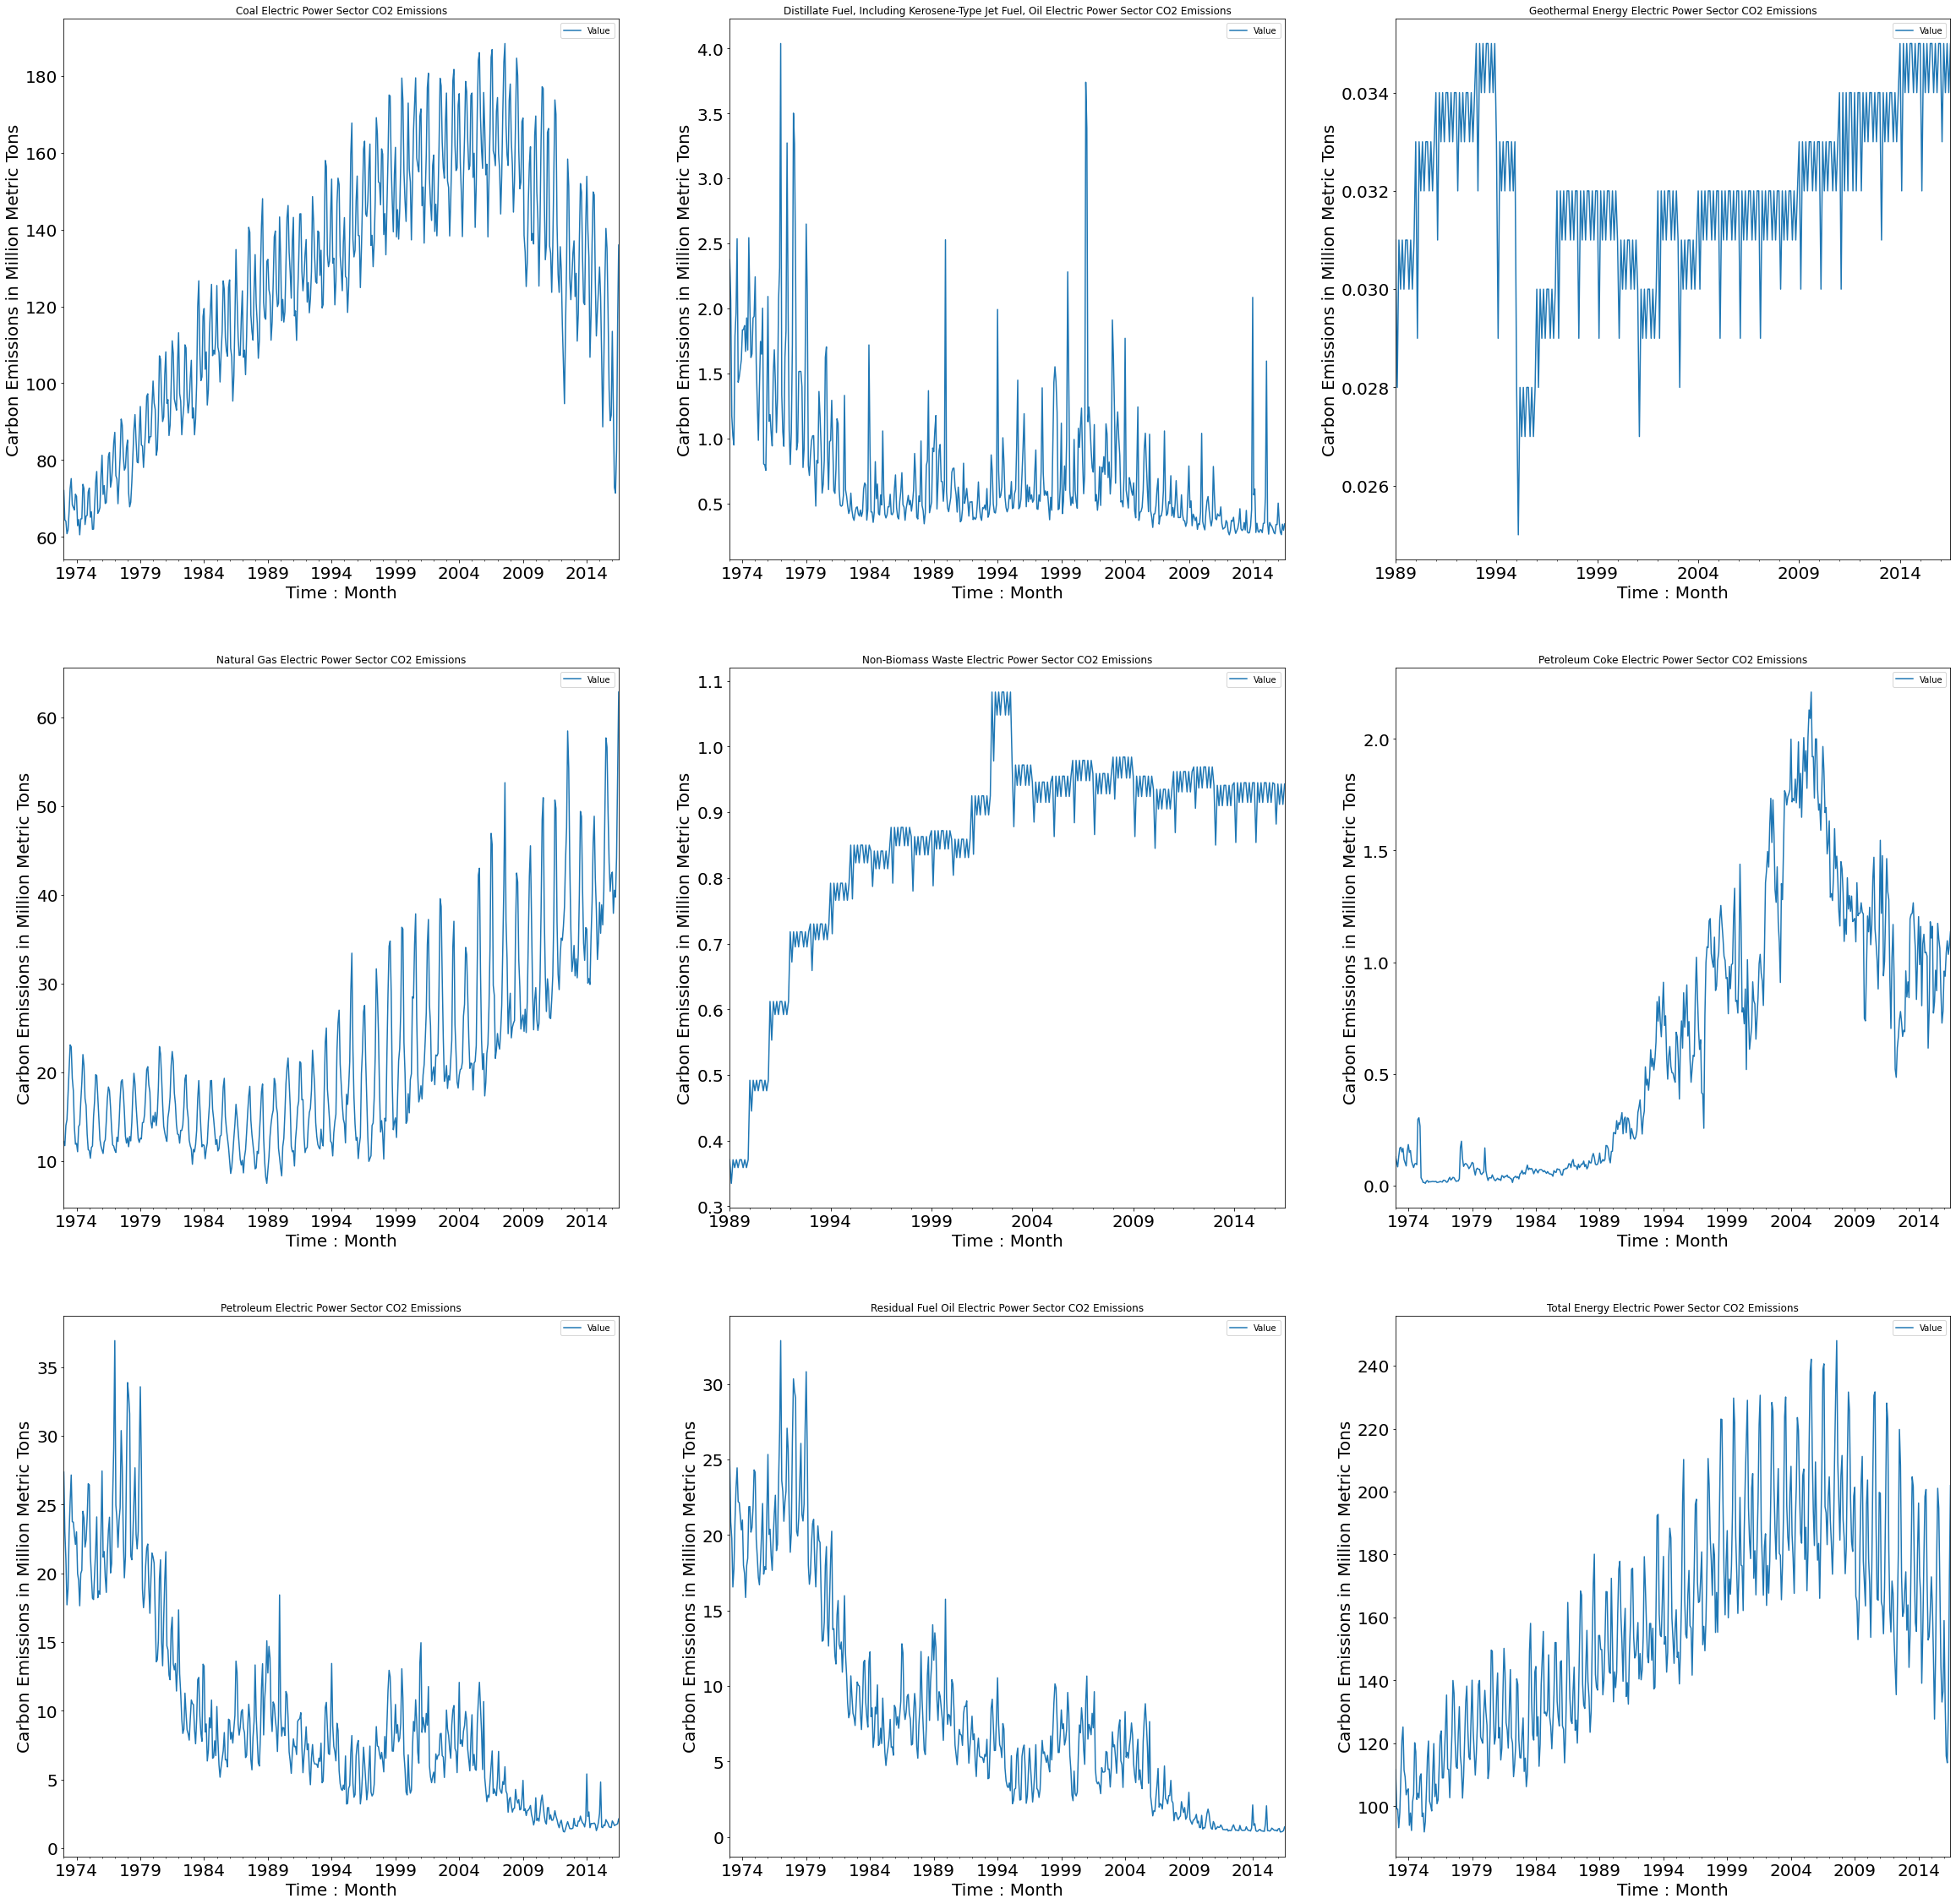

In [28]:
#Plot per Emission source
fig, axes = plt.subplots(3,3, figsize = (40, 40))
for (desc, group), ax in zip(sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

In [29]:
QuantityPerSource = ts.groupby('Description')['Value'].sum().sort_values()
src = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Full Emissions']

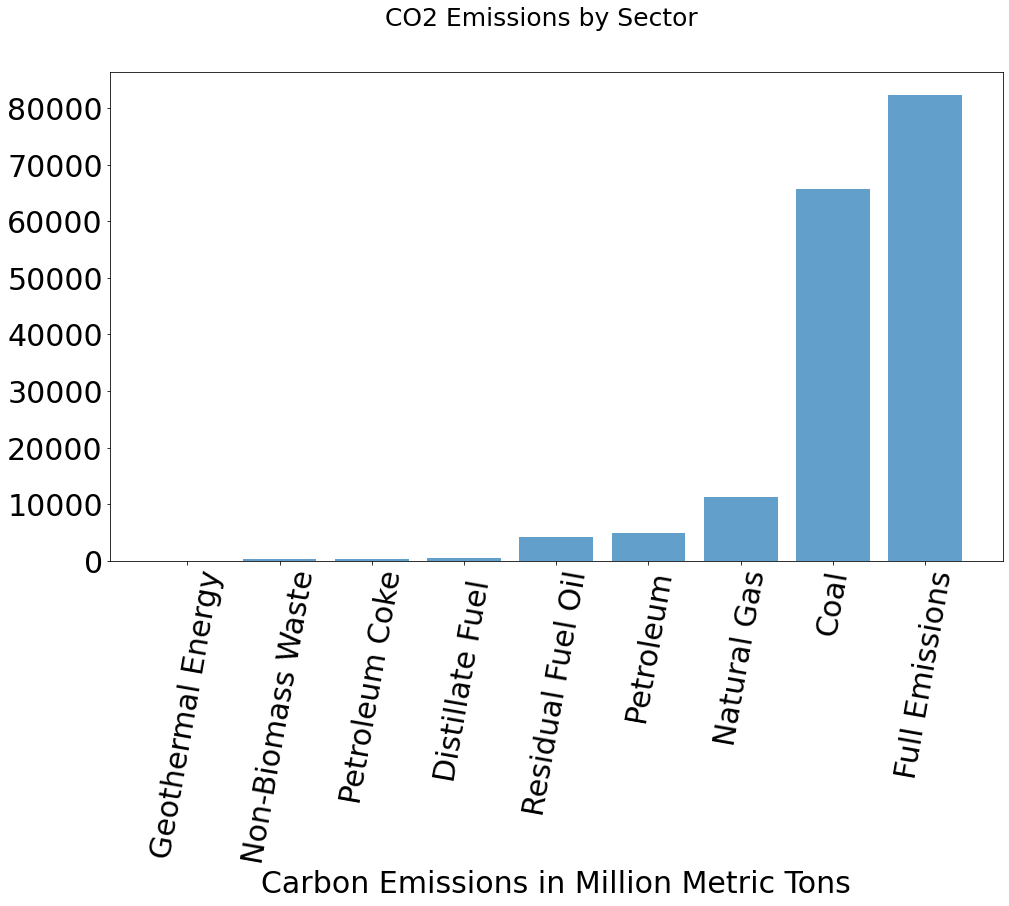

In [30]:
fig = plt.figure(figsize = (16,9))
x_label = src
x_tick = np.arange(len(src))
plt.bar(x_tick, QuantityPerSource, align = 'center', alpha = 0.7)
fig.suptitle("CO2 Emissions by Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 80, fontsize = 30 )
plt.yticks(fontsize = 30)
plt.xlabel('Carbon Emissions in Million Metric Tons', fontsize = 30)
plt.show()

In [31]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
pte = ems[ems['Description'] =="Petroleum Electric Power Sector CO2 Emissions"]
pte = pte.drop(['Description'], axis=1)
pte

,Value
Month,
1973-01-01,27.369
1973-02-01,23.034
1973-03-01,21.034
1973-04-01,17.714
1973-05-01,18.870
...,...
2016-03-01,1.654
2016-04-01,1.695
2016-05-01,1.743


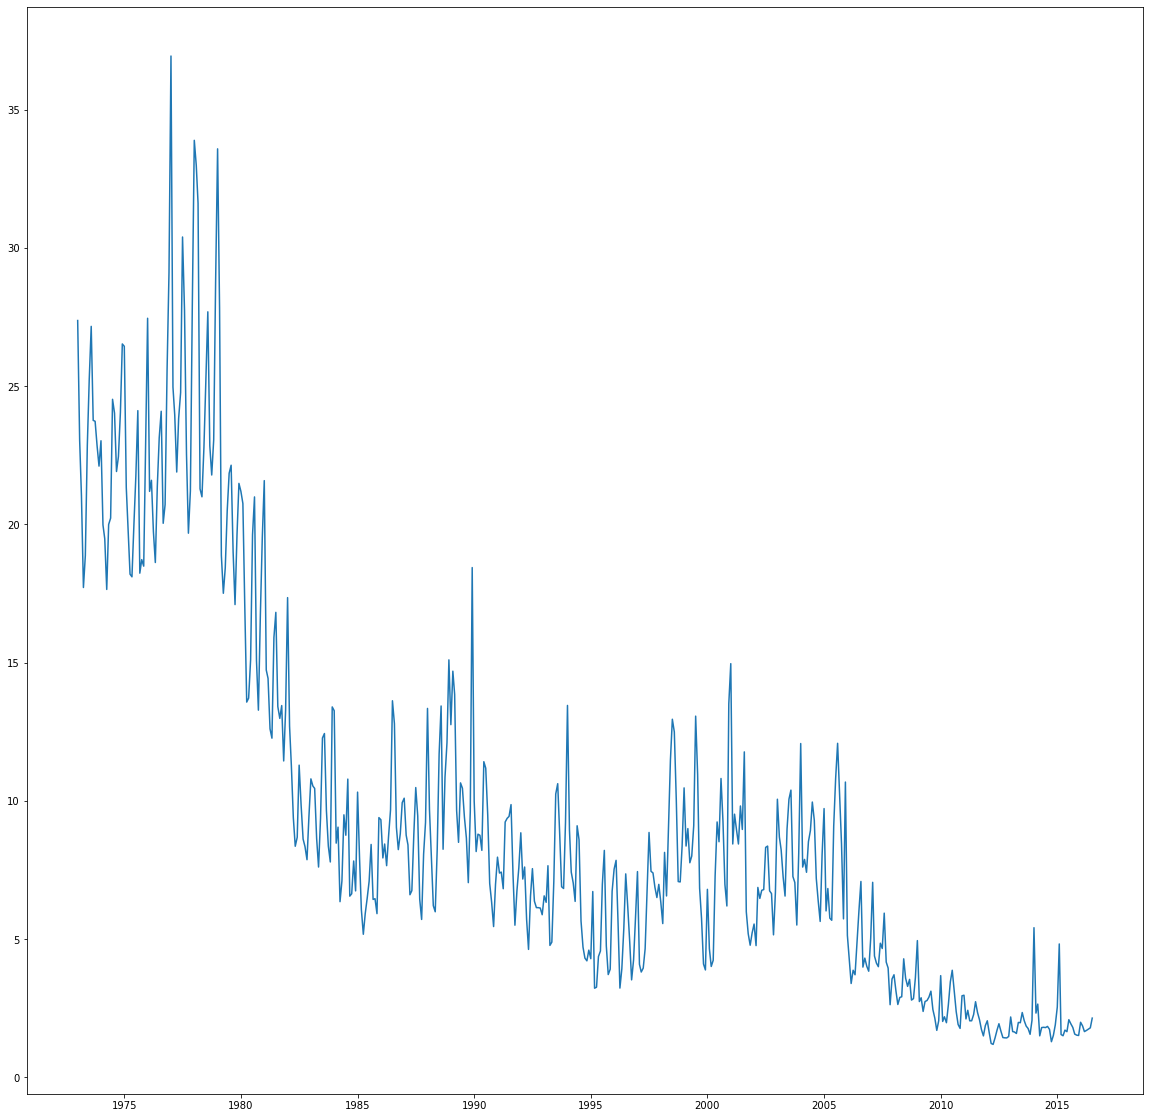

In [32]:
plt.plot(pte)
# same result 

In [33]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

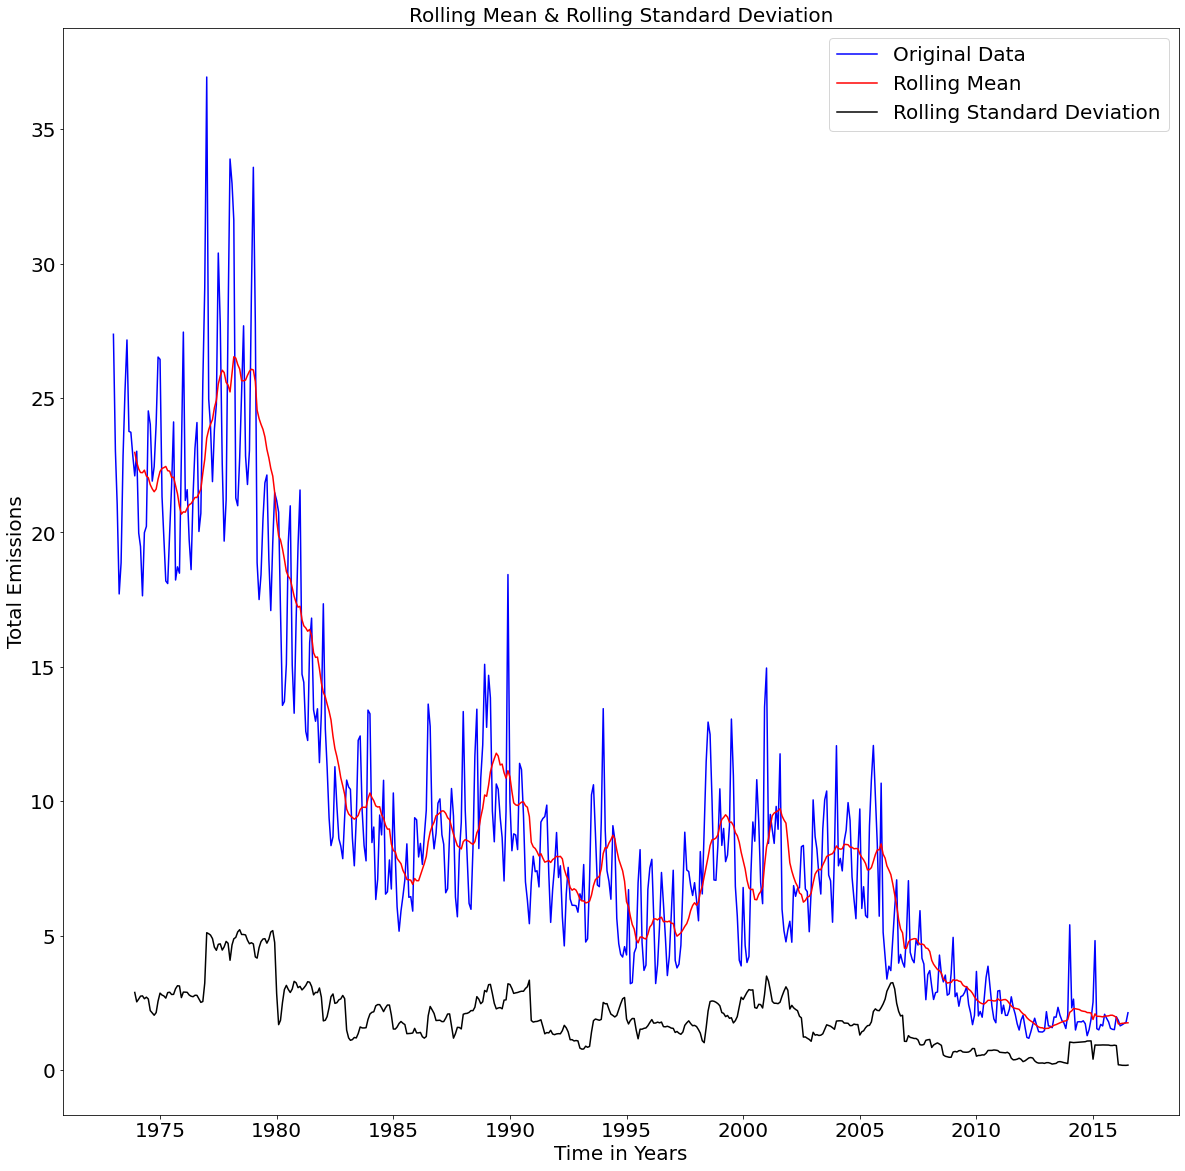

In [34]:
def TestStationaryPlt(pte):
    rolling_mean = pte.rolling(window = 12, center = False).mean()
    rolling_std = pte.rolling(window = 12, center = False).std()   
    plt.plot(pte, color = 'blue',label = 'Original Data')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color ='black', label = 'Rolling Standard Deviation')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)    
    plt.xlabel('Time in Years', fontsize = 20)
    plt.ylabel('Total Emissions', fontsize = 20)   
    plt.legend(loc='best', fontsize = 20)
    plt.title('Rolling Mean & Rolling Standard Deviation', fontsize = 20)
    plt.show()
TestStationaryPlt(pte)

In [35]:
def Adf_test(pte):
    result = adfuller(pte['Value'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
Adf_test(pte)

ADF Statistic: -1.5772399363509164
p-value: 0.4950157307222806
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


In [36]:
moving_avg = pte.rolling(12).mean()
pte_trans = pte - moving_avg
pte_trans.head(13)

,Value
Month,
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN
1973-06-01,NaN
1973-07-01,NaN
1973-08-01,NaN
1973-09-01,NaN


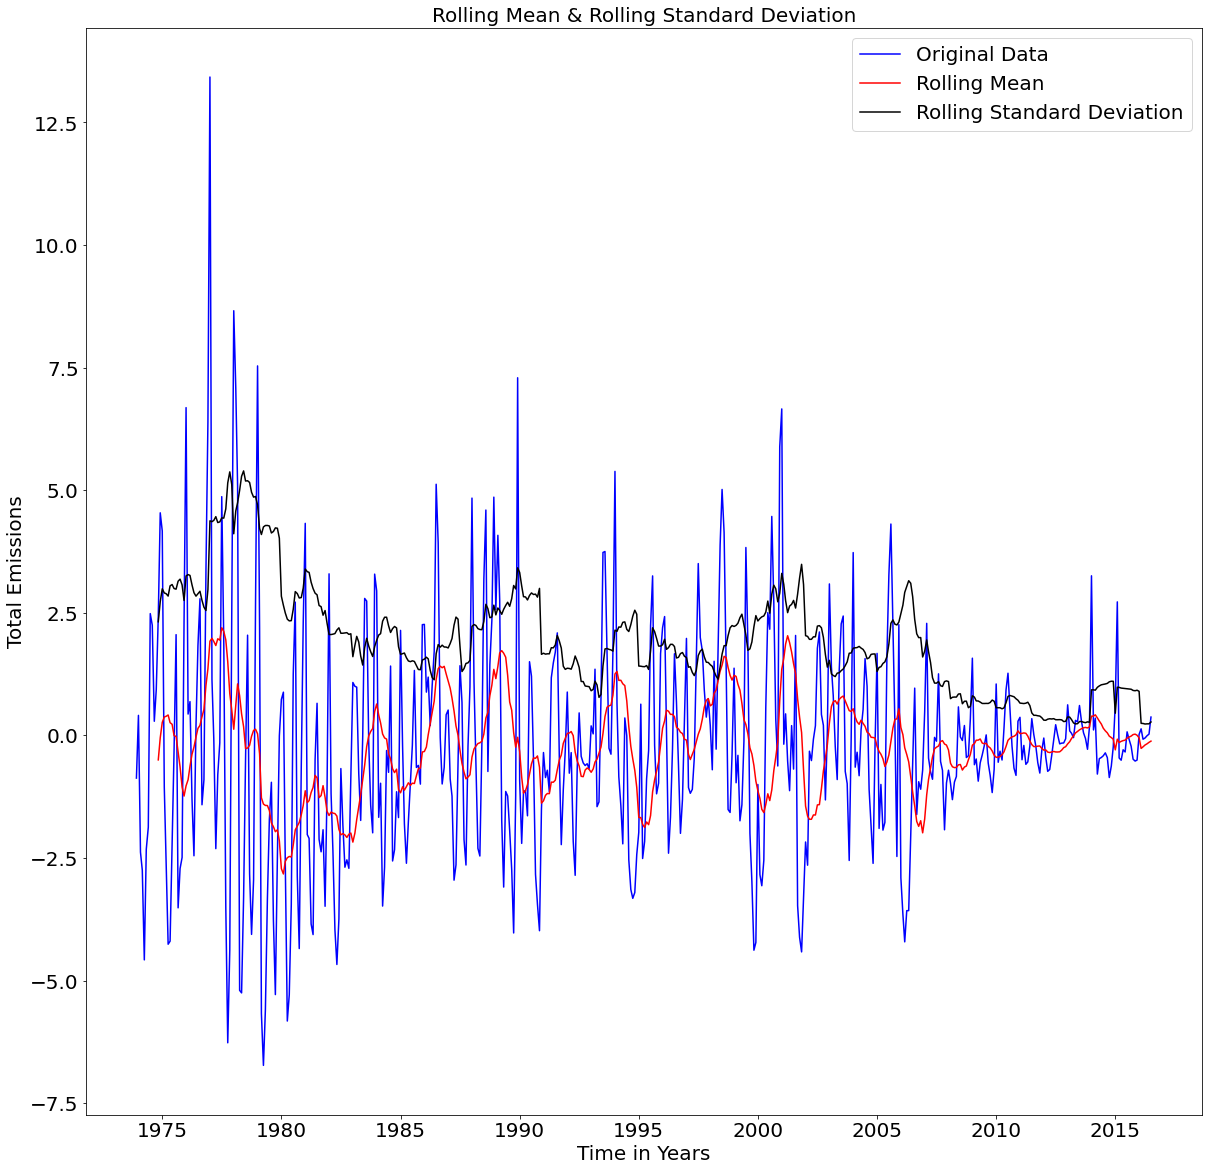

In [37]:
pte_trans.dropna(inplace=True)
TestStationaryPlt(pte_trans)

In [38]:
Adf_test(pte_trans)

ADF Statistic: -6.4167199237629955
p-value: 1.833542177311848e-08
Critical Values:
	1%: -3.4435761493506294
	5%: -2.867372960189225
	10%: -2.5698767442886696


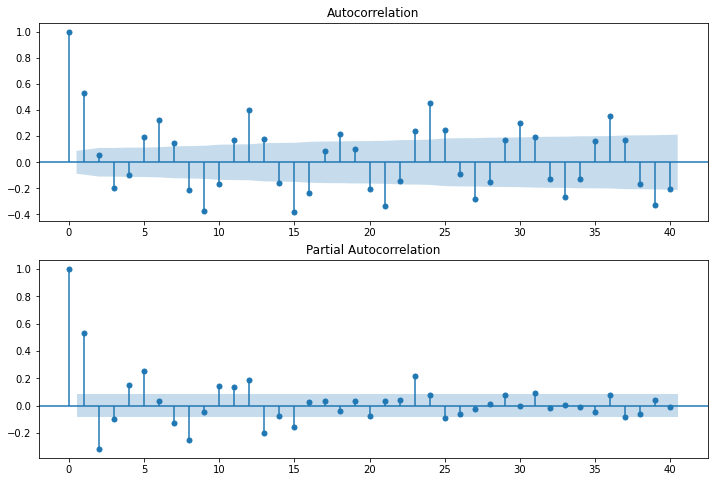

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pte_trans.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pte_trans.iloc[13:], lags=40, ax=ax2)

In [40]:
mod = sm.tsa.statespace.SARIMAX(pte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\samee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\samee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4907      0.058      8.487      0.000       0.377       0.604
ma.L1         -0.8241      0.043    -19.351      0.000      -0.908      -0.741
ma.S.L12      -0.8368      0.027    -30.521      0.000      -0.891      -0.783
sigma2         2.8219      0.117     24.151      0.000       2.593       3.051


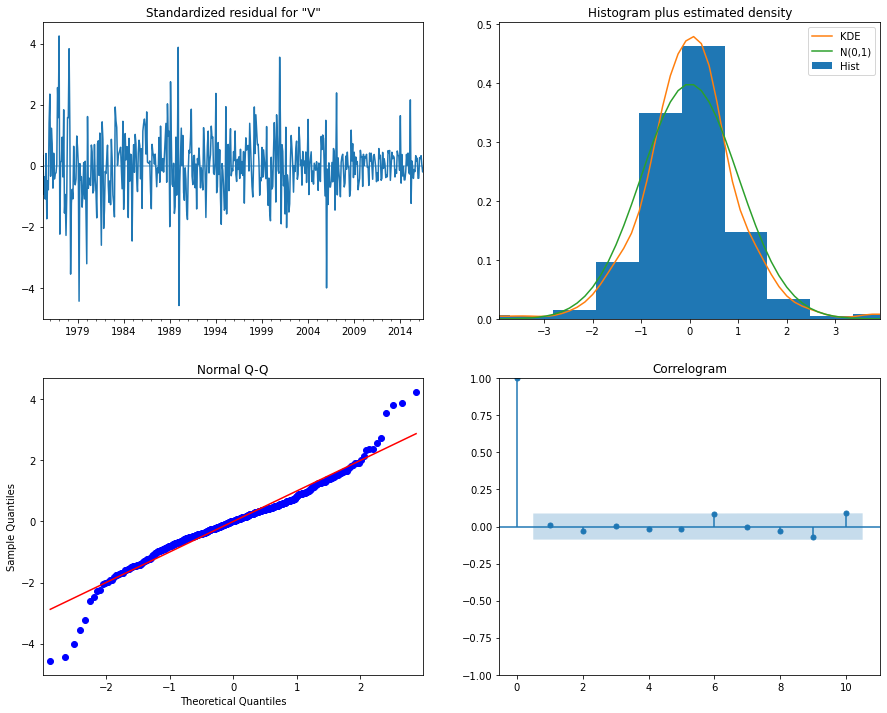

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:ylabel='Density'>

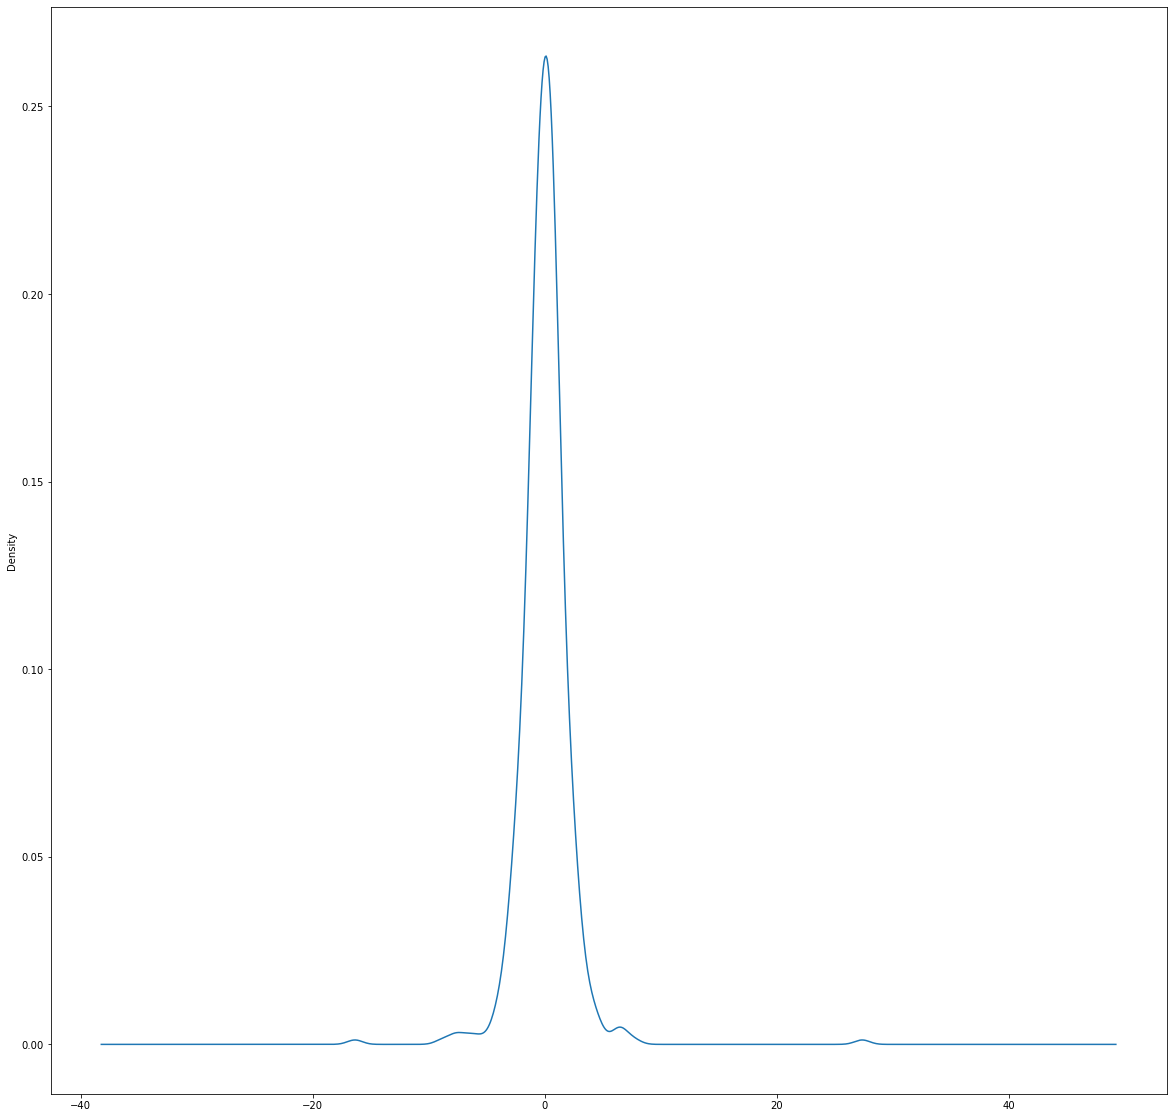

In [42]:
# gaussian residual error
results.resid.plot(kind='kde')

In [43]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Value,upper Value
1998-01-01,4.767898,11.352980
1998-02-01,2.235058,8.820106
1998-03-01,1.609884,8.194924
1998-04-01,2.598297,9.183333
1998-05-01,2.909631,9.494664


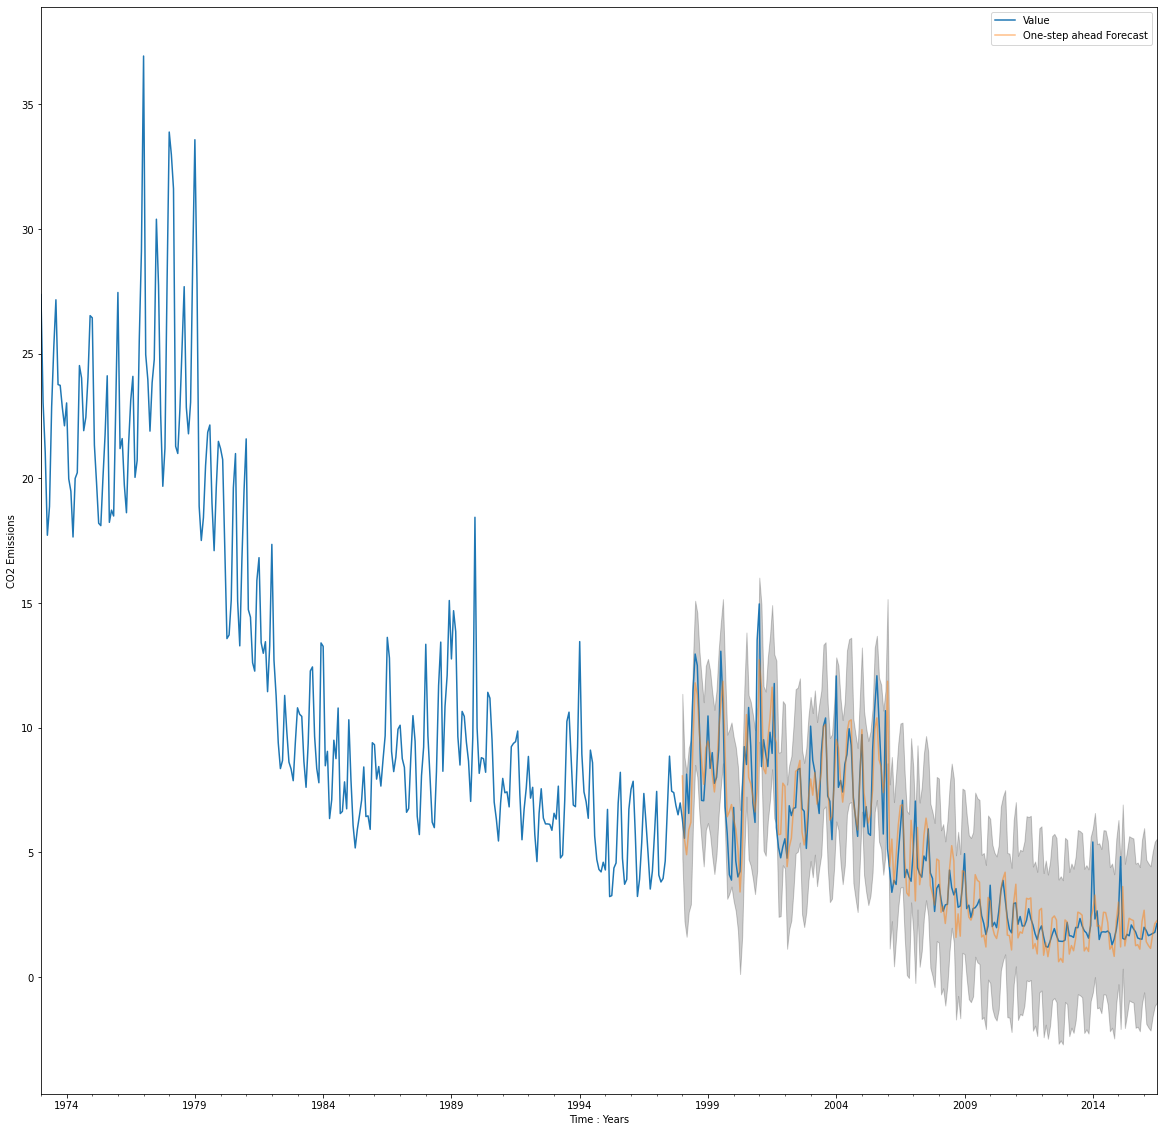

In [44]:
ax = pte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time : Years')
ax.set_ylabel('CO2 Emissions')
plt.legend()

plt.show()